# Getting the most engagement on your post: An analysis on HackerNews

This project aims to analyze the dataset describing the user posts in the website HackerNews in order to find the best time to ask a question or show interesting things on HackerNews.
We will focus on 
- number of ask posts vs number of show posts
- average comments and counts per posts
- the time of day where there is most engagement

## Summary of the result
- on average ask posts receive more comments
- 15:00 is the best time to ask a question on Hacker News

In [125]:
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [49]:
hnews_list = pd.read_csv("hacker_news.csv")

In [50]:
hnews_list.head()

,id,title,url,num_points,num_comments,author,created_at
0,12224879,Interactive Dynamic Video,http://www.interactivedynamicvideo.com/,386,52,ne0phyte,8/4/2016 11:52
1,10975351,How to Use Open Source and Shut the Fuck Up at...,http://hueniverse.com/2016/01/26/how-to-use-op...,39,10,josep2,1/26/2016 19:30
2,11964716,Florida DJs May Face Felony for April Fools' W...,http://www.thewire.com/entertainment/2013/04/f...,2,1,vezycash,6/23/2016 22:20
3,11919867,Technology ventures: From Idea to Enterprise,https://www.amazon.com/Technology-Ventures-Ent...,3,1,hswarna,6/17/2016 0:01
4,10301696,Note by Note: The Making of Steinway L1037 (2007),http://www.nytimes.com/2007/11/07/movies/07ste...,8,2,walterbell,9/30/2015 4:12


In [51]:
hnews_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20100 entries, 0 to 20099
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            20100 non-null  int64 
 1   title         20100 non-null  object
 2   url           17660 non-null  object
 3   num_points    20100 non-null  int64 
 4   num_comments  20100 non-null  int64 
 5   author        20100 non-null  object
 6   created_at    20100 non-null  object
dtypes: int64(3), object(4)
memory usage: 1.1+ MB


In [52]:
hnews_list["title"].head()

0                            Interactive Dynamic Video
1    How to Use Open Source and Shut the Fuck Up at...
2    Florida DJs May Face Felony for April Fools' W...
3         Technology ventures: From Idea to Enterprise
4    Note by Note: The Making of Steinway L1037 (2007)
Name: title, dtype: object

In [53]:
ask_posts = hnews_list[hnews_list["title"].str.lower().str.startswith("ask hn")]
show_posts = hnews_list[hnews_list["title"].str.lower().str.startswith("show hn")]
other_posts = pd.concat([hnews_list, pd.concat([ask_posts, show_posts])]).drop_duplicates(keep = False)

In [54]:
print(len(ask_posts), len(show_posts), len(other_posts))

1744 1162 17194


In [55]:
other_posts[:3]

,id,title,url,num_points,num_comments,author,created_at
0,12224879,Interactive Dynamic Video,http://www.interactivedynamicvideo.com/,386,52,ne0phyte,8/4/2016 11:52
1,10975351,How to Use Open Source and Shut the Fuck Up at...,http://hueniverse.com/2016/01/26/how-to-use-op...,39,10,josep2,1/26/2016 19:30
2,11964716,Florida DJs May Face Felony for April Fools' W...,http://www.thewire.com/entertainment/2013/04/f...,2,1,vezycash,6/23/2016 22:20


In [56]:
show_posts.head()

,id,title,url,num_points,num_comments,author,created_at
13,10627194,Show HN: Wio Link ESP8266 Based Web of Things...,https://iot.seeed.cc,26,22,kfihihc,11/25/2015 14:03
39,10646440,Show HN: Something pointless I made,http://dn.ht/picklecat/,747,102,dhotson,11/29/2015 22:46
46,11590768,"Show HN: Shanhu.io, a programming playground p...",https://shanhu.io,1,1,h8liu,4/28/2016 18:05
84,12178806,Show HN: Webscope Easy way for web developers...,http://webscopeapp.com,3,3,fastbrick,7/28/2016 7:11
97,10872799,Show HN: GeoScreenshot Easily test Geo-IP bas...,https://www.geoscreenshot.com/,1,9,kpsychwave,1/9/2016 20:45


## Average number of comments per posts

In [57]:
ask_posts.loc[:, ["num_points", "num_comments"]].mean(numeric_only = True)

num_points      15.061927
num_comments    14.038417
dtype: float64

In [58]:
show_posts.loc[:, ["num_points", "num_comments"]].mean(numeric_only = True)

num_points      27.555077
num_comments    10.316695
dtype: float64

In [59]:
ask_posts["created_at"] = pd.to_datetime(ask_posts["created_at"], format = "%m/%d/%Y %H:%M")

C:\Users\Prashjeev\AppData\Local\Temp\ipykernel_10260\1793579029.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ask_posts["created_at"] = pd.to_datetime(ask_posts["created_at"], format = "%m/%d/%Y %H:%M")


In [60]:
ask_posts["hour"] = ask_posts["created_at"].dt.hour

C:\Users\Prashjeev\AppData\Local\Temp\ipykernel_10260\1856746366.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ask_posts["hour"] = ask_posts["created_at"].dt.hour


In [61]:
ask_posts["hour"].unique()

array([ 9, 13, 10, 14, 16, 23, 12, 17, 15, 21, 20,  2, 18,  3,  5, 19,  1,
       22,  8,  4,  0,  6,  7, 11], dtype=int64)

In [62]:
ask_posts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1744 entries, 7 to 20061
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            1744 non-null   int64         
 1   title         1744 non-null   object        
 2   url           7 non-null      object        
 3   num_points    1744 non-null   int64         
 4   num_comments  1744 non-null   int64         
 5   author        1744 non-null   object        
 6   created_at    1744 non-null   datetime64[ns]
 7   hour          1744 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(3)
memory usage: 122.6+ KB


In [96]:
show_posts["created_at"] = pd.to_datetime(show_posts["created_at"], format = "%m/%d/%Y %H:%M")

C:\Users\Prashjeev\AppData\Local\Temp\ipykernel_10260\2273264343.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  show_posts["created_at"] = pd.to_datetime(show_posts["created_at"], format = "%m/%d/%Y %H:%M")


In [97]:
show_posts["hour"] = show_posts["created_at"].dt.hour

C:\Users\Prashjeev\AppData\Local\Temp\ipykernel_10260\3099763721.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  show_posts["hour"] = show_posts["created_at"].dt.hour


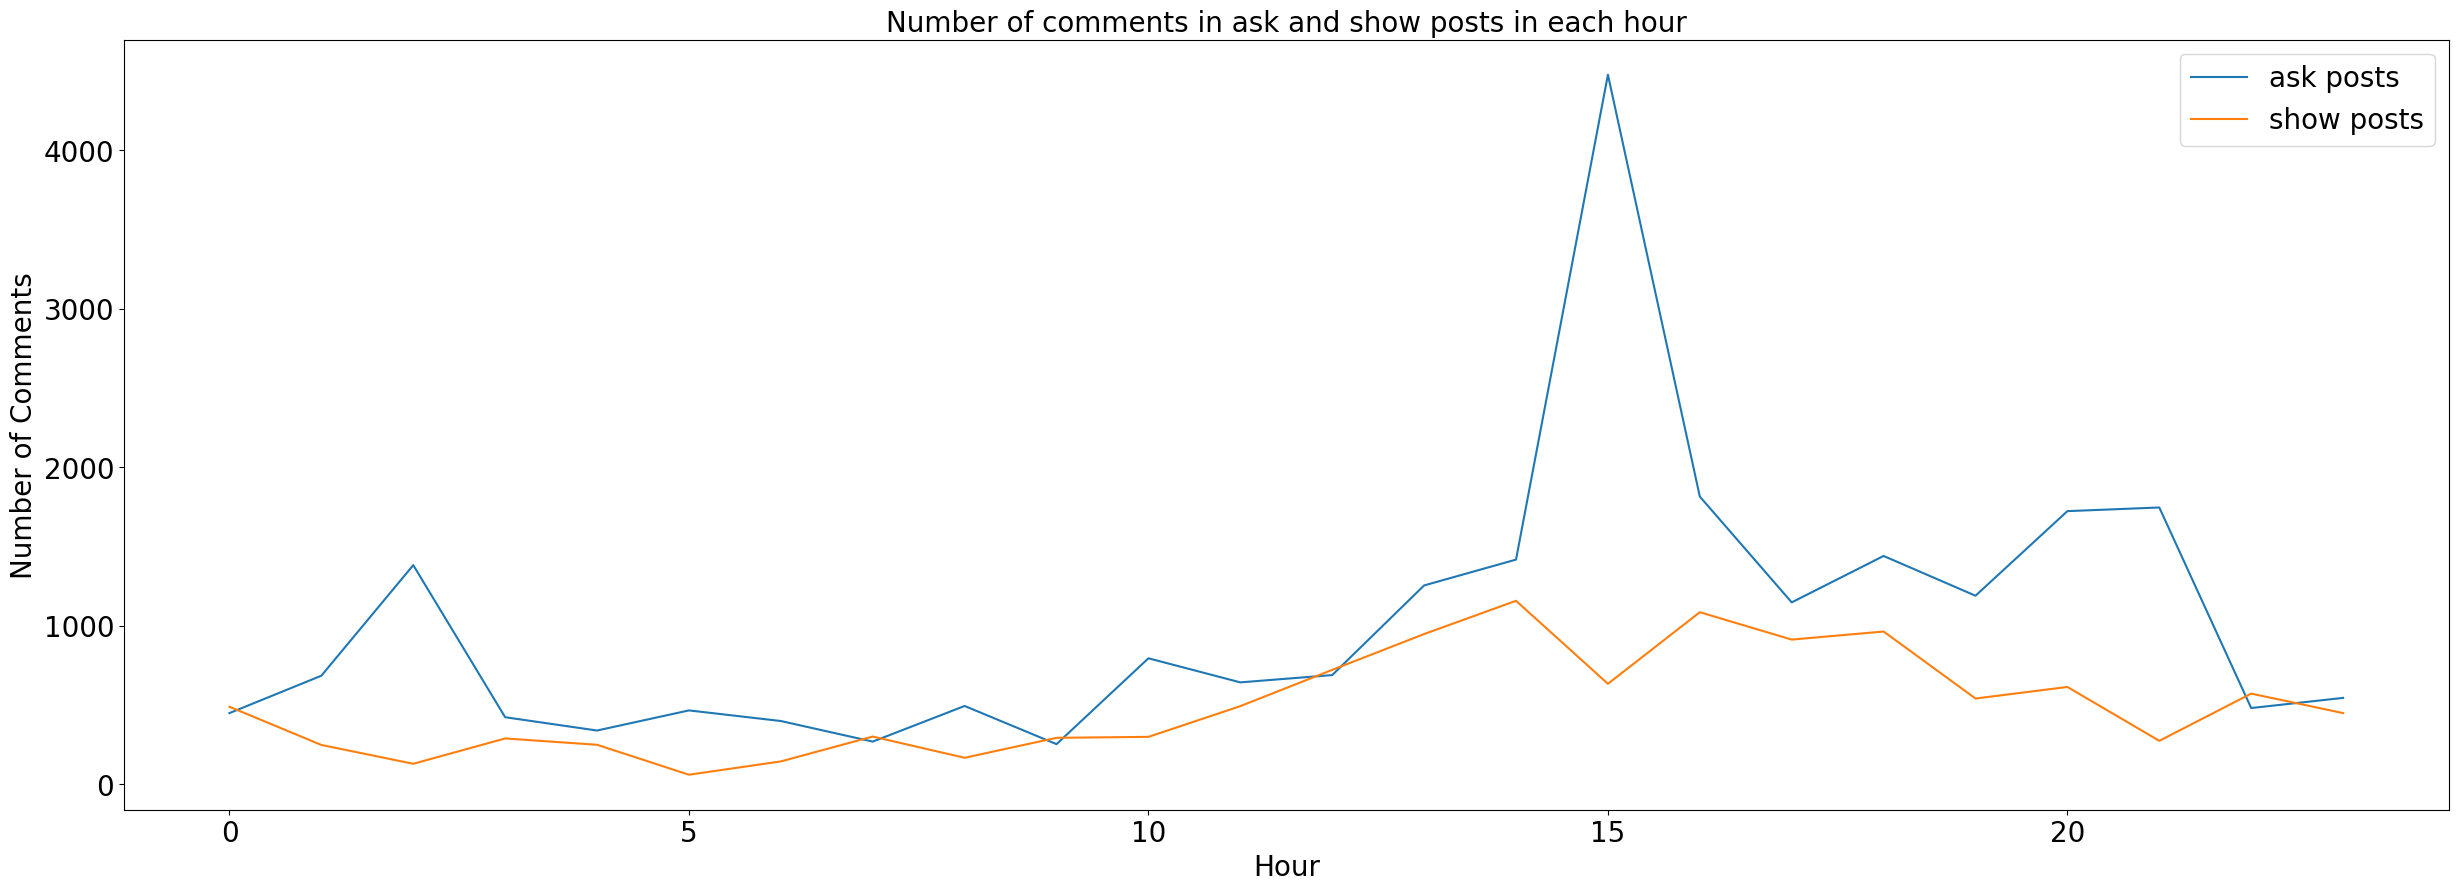

In [112]:
plt.figure(figsize = (30, 10))
ask_posts.groupby("hour")["num_comments"].sum().plot.line(x = "hour", y = "num_comments", label = "ask posts")
show_posts.groupby("hour")["num_comments"].sum().plot.line(x = "hour", y = "num_comments", label = "show posts")
plt.title("Number of comments in ask and show posts in each hour", fontsize = 20)
plt.ylabel("Number of Comments", fontsize = 20)
plt.xlabel("Hour", fontsize = 20)
plt.xticks(fontsize = 20, rotation = 0)
plt.yticks(fontsize = 20)
plt.legend(fontsize = 20)
plt.show()

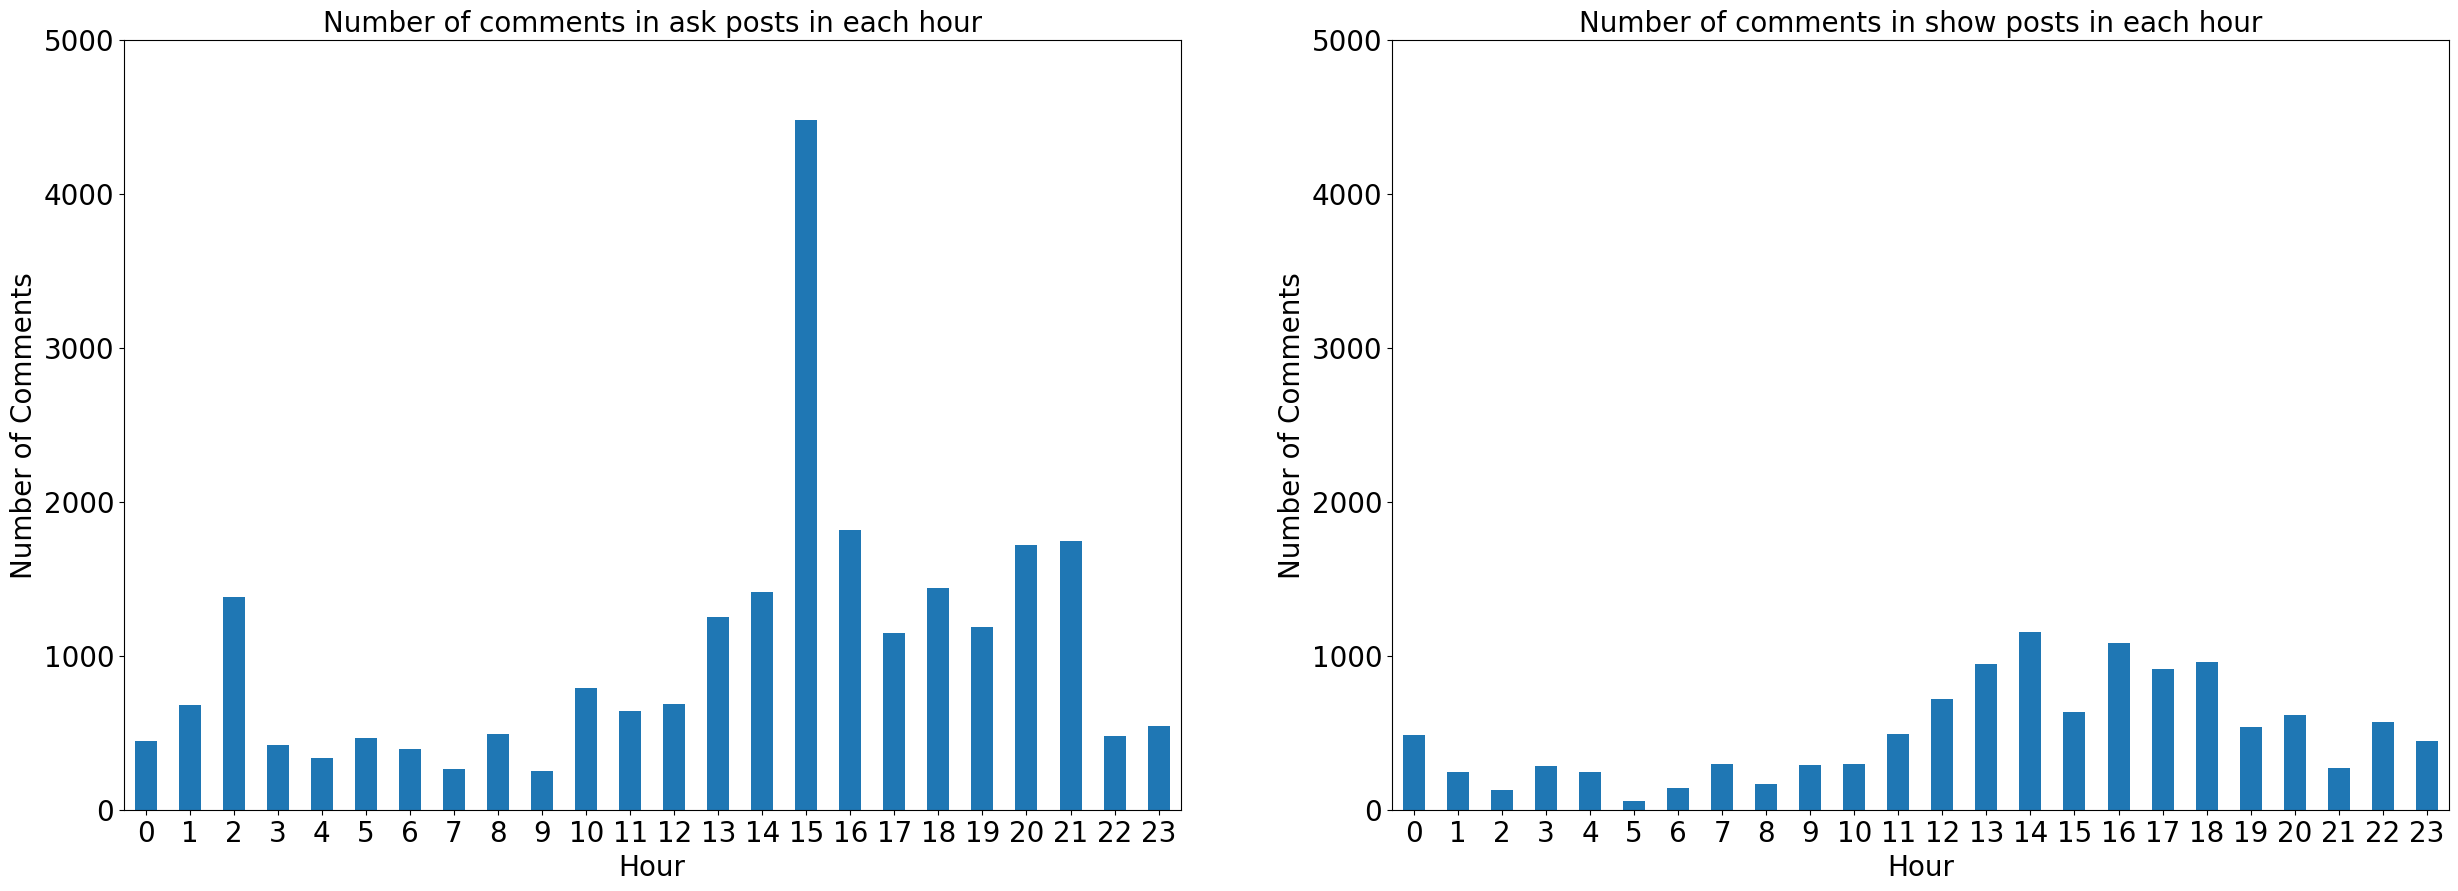

In [110]:
plt.figure(figsize = (30, 10))
plt.subplot(1,2,1)
ask_posts.groupby("hour")["num_comments"].sum().plot.bar(x = "hour", y = "num_comments")
plt.title("Number of comments in ask posts in each hour", fontsize = 20)
plt.ylabel("Number of Comments", fontsize = 20)
plt.xlabel("Hour", fontsize = 20)
plt.xticks(fontsize = 20, rotation = 0)
plt.yticks(fontsize = 20)
plt.ylim(0,5000)
plt.subplot(1,2,2)
show_posts.groupby("hour")["num_comments"].sum().plot.bar(x = "hour", y = "num_comments")
plt.title("Number of comments in show posts in each hour", fontsize = 20)
plt.ylabel("Number of Comments", fontsize = 20)
plt.xlabel("Hour", fontsize = 20)
plt.xticks(fontsize = 20, rotation = 0)
plt.yticks(fontsize = 20)
plt.ylim(0,5000)
plt.show()

In [74]:
ask_posts.groupby("hour")["num_comments"].sum()

hour
0      447
1      683
2     1381
3      421
4      337
5      464
6      397
7      267
8      492
9      251
10     793
11     641
12     687
13    1253
14    1416
15    4477
16    1814
17    1146
18    1439
19    1188
20    1722
21    1745
22     479
23     543
Name: num_comments, dtype: int64

## Average number of comments in Ask Posts by hour

In [114]:
ask_posts.groupby("hour")["num_comments"].mean().sort_values(ascending = False)

hour
15    38.594828
2     23.810345
20    21.525000
16    16.796296
21    16.009174
13    14.741176
10    13.440678
14    13.233645
18    13.201835
17    11.460000
1     11.383333
11    11.051724
19    10.800000
8     10.250000
5     10.086957
12     9.410959
6      9.022727
0      8.127273
23     7.985294
7      7.852941
3      7.796296
4      7.170213
22     6.746479
9      5.577778
Name: num_comments, dtype: float64

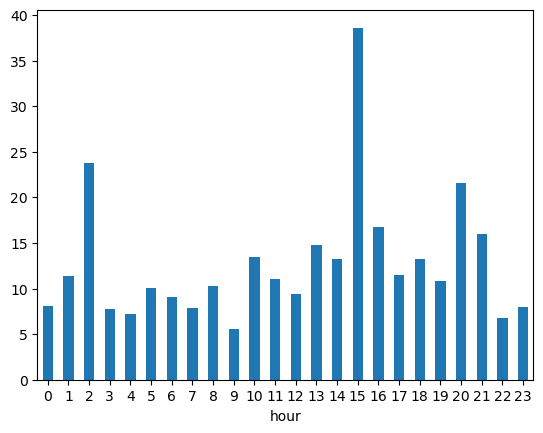

In [117]:
ask_posts.groupby("hour")["num_comments"].mean().plot.bar(x = "hour", y = "num_comments")
plt.xticks(rotation = 0)
plt.show()

In [262]:
other_posts["created_at"] = pd.to_datetime(other_posts["created_at"], format = "%m/%d/%Y %H:%M")

In [263]:
other_posts["hour"] = other_posts["created_at"].dt.hour

<Axes: xlabel='hour', ylabel='num_points'>

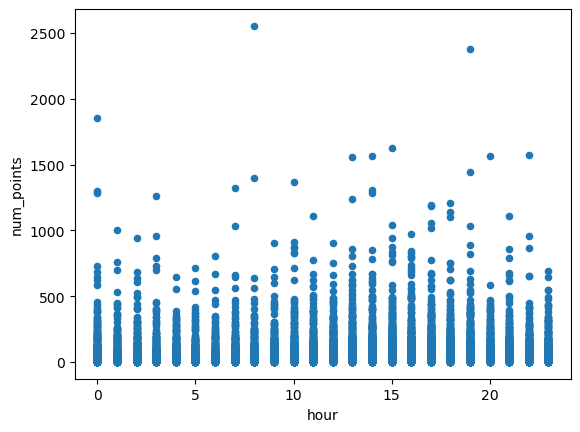

In [264]:
other_posts.plot.scatter(x = "hour", y = "num_points")

## Analysis Conclusion
We analyzed the dataset and discovered a number of interesting things.
- ask posts on average get more comments per post, which is an indicator that users on hacker news are willing to help other users.
- found the list of hours in which ask posts will receive the most engagement(comments).

In [251]:
def cost_function(x, y, w, b):
    return (((w*x + b - y)**2).sum())/(2*x.size)

In [165]:
def compute_gradient(x, y, w, b):
    dj_dw = (((w*x + b - y)*x).sum())/x.size
    dj_db = (((w*x + b - y)).sum())/x.size
    return dj_dw, dj_db

In [239]:
def gradient_descent(x, y, w, b, alpha, num_iters, threshold):
    cost_history = []
    m = x.size
    for i in range(num_iters):
        error = (w*x + b) - y
        dj_dw = (error*x).sum()/m
        dj_db = error.sum()/m
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        cost = ((error**2).sum())/(2*m)
        cost_history.append(cost)
        if i % 1000 == 0:
            print(f"Iteration : {i:4}, Cost = {cost_history[-1]:0.2e}")
    return w, b

In [240]:
ask_posts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1744 entries, 7 to 20061
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            1744 non-null   int64         
 1   title         1744 non-null   object        
 2   url           7 non-null      object        
 3   num_points    1744 non-null   int64         
 4   num_comments  1744 non-null   int64         
 5   author        1744 non-null   object        
 6   created_at    1744 non-null   datetime64[ns]
 7   hour          1744 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(3)
memory usage: 187.2+ KB


In [241]:
x_train = np.array(ask_posts["hour"][:1221])
y_train = np.array(ask_posts["num_comments"][:1221])

In [272]:
x_train[:5]

array([ 9, 13, 10, 14, 16], dtype=int64)

In [273]:
y_train[:5]

array([ 6, 29,  1,  3, 17], dtype=int64)

In [242]:
compute_gradient(x_train, y_train, 0, 0)

(-208.5855855855856, -14.636363636363637)

In [256]:
cost_function(x_train, y_train, 2, 2)

1686.0028665028665

In [287]:
w, b = gradient_descent(x = x_train, y = y_train, w = 0, b = 0, alpha = 1e-3, num_iters = 100000, threshold = 0.01)

Iteration :    0, Cost = 1.64e+03
Iteration : 1000, Cost = 1.54e+03
Iteration : 2000, Cost = 1.54e+03
Iteration : 3000, Cost = 1.53e+03
Iteration : 4000, Cost = 1.53e+03
Iteration : 5000, Cost = 1.53e+03
Iteration : 6000, Cost = 1.53e+03
Iteration : 7000, Cost = 1.53e+03
Iteration : 8000, Cost = 1.53e+03
Iteration : 9000, Cost = 1.53e+03
Iteration : 10000, Cost = 1.53e+03
Iteration : 11000, Cost = 1.53e+03
Iteration : 12000, Cost = 1.53e+03
Iteration : 13000, Cost = 1.53e+03
Iteration : 14000, Cost = 1.53e+03
Iteration : 15000, Cost = 1.53e+03
Iteration : 16000, Cost = 1.53e+03
Iteration : 17000, Cost = 1.53e+03
Iteration : 18000, Cost = 1.53e+03
Iteration : 19000, Cost = 1.53e+03
Iteration : 20000, Cost = 1.53e+03
Iteration : 21000, Cost = 1.53e+03
Iteration : 22000, Cost = 1.53e+03
Iteration : 23000, Cost = 1.53e+03
Iteration : 24000, Cost = 1.53e+03
Iteration : 25000, Cost = 1.53e+03
Iteration : 26000, Cost = 1.53e+03
Iteration : 27000, Cost = 1.53e+03
Iteration : 28000, Cost = 1.53

In [288]:
def probable_comment_num(x):
    return w * x + b

In [289]:
probable_comment_num(16)

15.602077069787445